### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [4]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [8]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

Enter the code of the stock:-  NG=F


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [10]:
data.shape 

(3282, 5)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,3.710604,3.784235,3.632463,3.704380,131832.353808
std,1.827700,1.863149,1.787076,1.822525,54227.259508
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691000,2.735000,2.643000,2.692000,92091.250000
50%,3.251500,3.300500,3.178000,3.238000,127025.000000
75%,4.155250,4.240250,4.064250,4.151000,161796.000000
max,13.580000,13.694000,13.304000,13.505000,459196.000000


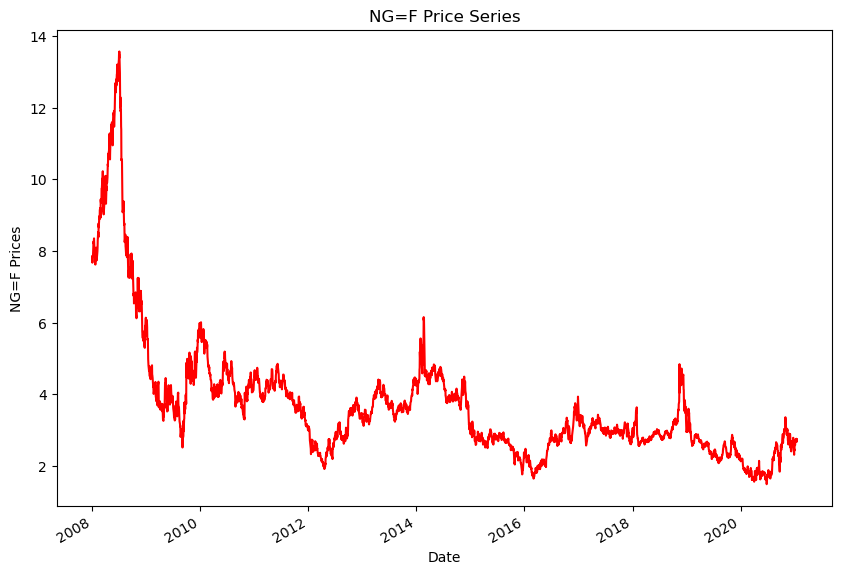

In [18]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Milkias\AppData\Local\Temp\ipykernel_40536\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

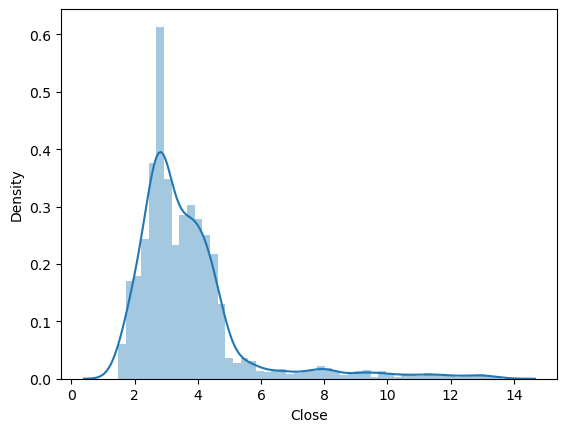

In [20]:
sns.distplot(data["Close"])

C:\Users\Milkias\AppData\Local\Temp\ipykernel_40536\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

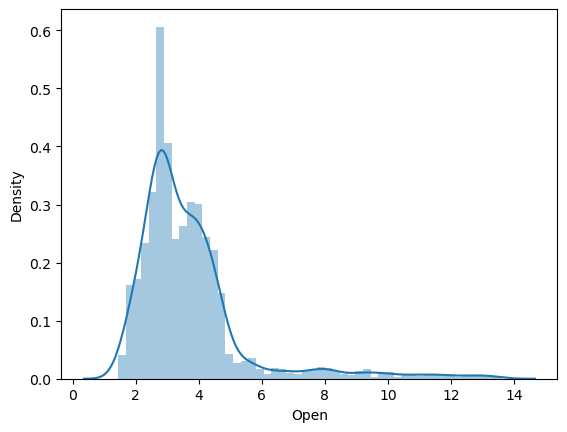

In [22]:
sns.distplot(data["Open"])

C:\Users\Milkias\AppData\Local\Temp\ipykernel_40536\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

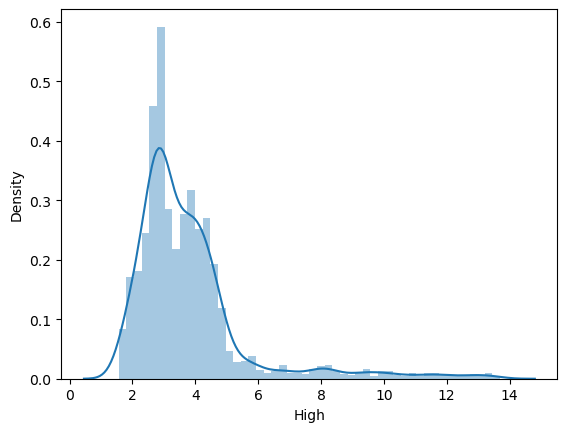

In [24]:
sns.distplot(data["High"])

In [26]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

# this removes the 'close' column from the dataset and saves the remaining columns which are 'Open,High, Low, Volume' as features(independent variables)
X = data.drop("Close", axis=1)

# this defines the target variable y, which is the stock's 'Close' price (the value you want to predict)
y = data["Close"]  

# this function splits the data into training and testing sets
from sklearn.model_selection import train_test_split 


# X_train: features for training the model
# X_test: features for testing the model
# y_train: target values for training
# y_test: target values for testing

#the text_size=0.2 means that 20% is reserved for testing, and the remaining 80% is used for training.   The random_state=0 ensures the results are reproducible
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 



(2625, 4)
(657, 4)
(2625,)
(657,)


In [30]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()  # Create a Linear Regression model, which fits a straight line to the training data
lr.fit(X_train, y_train)  # Train the model using the training data, which trains the linear regression model using the training features (x_train) and the target values(y_train)
pred1 = lr.predict(X_test) # Predict the 'Close' prices for the test data
pred1

array([ 2.80025521,  5.71452107,  2.67598004,  5.96209712,  2.11272627,
       12.78073553,  3.96962911,  4.87093937,  1.7957296 ,  4.77535218,
        2.88317702,  3.52438236,  2.78074708,  2.97823651,  4.2320276 ,
        2.46605691,  4.14343586,  4.57617542,  9.00290889,  2.93461728,
        4.41981471,  2.6638892 ,  2.54609005,  2.35659708,  2.85304719,
        1.96549634,  2.77466247,  3.91456824,  3.30051883,  4.7520832 ,
        4.02003703,  2.7084426 , 11.73817085,  4.23592618,  4.39406688,
        3.68320373,  3.52338075,  5.32779806,  3.6551215 ,  3.42242166,
        3.96382871,  2.42903792,  2.68051977,  2.61045398,  3.13018683,
        4.4270207 ,  4.27296423,  2.75934544,  3.85466274,  1.99377504,
        4.10987778,  2.45974884,  2.27348621,  3.96081824,  1.9306302 ,
        3.23567102,  3.76555422,  4.96458716,  4.33327308,  3.4028305 ,
        2.71162414,  3.90478554,  4.75601461,  3.15688221,  2.4433227 ,
        2.55267657,  4.36853634,  3.90557551,  2.4086365 ,  2.85

In [32]:
# MSE -- > Mean Squared Error, measures how close the predictions are to the actual values. Lower is better
# RMSE ---> sqrt(MSE), It gives the error in the same unit as the target variable('Close' price). Lower is better
# r2_square ---> r^2 score of 1.0 indicates a good model, represents how well the model explains the variablity of the target variable. 

# CALCULATING THE METRICS (MODEL EVALUATION)

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1) 

#after seeing the output 
# mse is very low, which means the model's predictions are very close to the actual values
# R^2 is almost 1. the model explains most of the variance in the stock 'Close' price. this indicates a very good fit

MSE:-  0.0015345662928849231
RMSE:-  0.03917354072438338
R2_score:-  0.9994383299702715


In [34]:
from sklearn.linear_model import Lasso, Ridge 

#laso adds a penalty for large coefficients, forcing some coefficinets to be exaclty zero(feature selection)
#ridge adds a penalty to prevent coefficients from becoming too large (prevents overfitting)

la = Lasso().fit(X_train, y_train ) #train the laso regression model
ri = Ridge().fit(X_train, y_train ) #train the Ridge regression model

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [42]:
calculate_metrics(y_test, la_p) #evalute the laso model

MSE:-  0.2369233626053286
RMSE:-  0.48674774021594447
R2_score:-  0.9132831519010187


In [44]:
calculate_metrics(y_test, ri_p)

# the laso model has higher RMSE and a lower R^2 score compared to Ridge, meaning Ridge fits the data better

MSE:-  0.0016151026199610343
RMSE:-  0.040188339353113785
R2_score:-  0.999408852689666


In [23]:
'''
    SVR: A more flexible regression model that can capture non-linear relationships by transforming the input features using kernels.

    GridSearchCV: Automates the process of finding the best hyperparameters for the SVR model.
      It tries all combinations of C, gamma, and kernel parameters and selects the best based on cross-validation
'''

from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 

'''
param_grid:  defines the values of C (regularization), 
            gamma (kernel coefficient), and 
            kernel (the type of kernel function, 
            here using 'rbf' for the radial basis function) to try during grid search.
'''

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.092, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.057, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.061, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.077, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.045, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.092, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.057, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.061, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.078, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.019, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.023, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.024, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.009, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.027, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.237, total=   0.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ...... C=10, gamma=0.001, kernel=rbf, score=-0.086, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.119, total=   1.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.173, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.018, total=   7.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.227, total=   9.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-1.332, total=   7.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.573, total=   8.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.985, total=   8.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.2min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') #use best parameters found by gridsearchcv
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

# after finding he best parameters(eg. c=10, gamma=0.01), retrain the svr model & use it to predict the 'Close' prices on the test data

In [46]:
# saving the model
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")